# Arxiv Papers
[source](https://arxiv.org/help/bulk_data)

<br><br><br>

Detail into the dataset, please refer to this [link](https://github.com/IIT-ML/ann-mitchell-text-classification/blob/master/data/arxiv_meta.md)

In [29]:
import urllib.request

url = 'http://export.arxiv.org/api/query?search_query=all:electron&start=0&max_results=10'
data = urllib.request.urlopen(url).read().strip()

# Arxiv Scraper Library

[Arxiv Scraper](https://github.com/mahdisadjadi/arxivscraper)

In [1]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

# Reference : https://arxiv.org/archive/cs

cs_arxiv_cat = {}

cs_arxiv_cat['cs.ai'] = 'Artificial Intelligence'
cs_arxiv_cat['cs.cl'] = 'Computation and Language'
cs_arxiv_cat['cs.cc'] = 'Computational Complexity'
cs_arxiv_cat['cs.ce'] = 'Computational Engineering, Finance, and Science'
cs_arxiv_cat['cs.cg'] = 'Computational Geometry'
cs_arxiv_cat['cs.gt'] = 'Computer Science and Game Theory'
cs_arxiv_cat['cs.cv'] = 'Computer Vision and Pattern Recognition'
cs_arxiv_cat['cs.cy'] = 'Computers and Society'
cs_arxiv_cat['cs.cr'] = 'Cryptography and Security'
cs_arxiv_cat['cs.ds'] = 'Data Structures and Algorithms'
cs_arxiv_cat['cs.db'] = 'Databases'
cs_arxiv_cat['cs.dl'] = 'Digital Libraries'
cs_arxiv_cat['cs.dm'] = 'Discrete Mathematics'
cs_arxiv_cat['cs.dc'] = 'Distributed, Parallel, and Cluster Computing'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.fl'] = 'Formal Languages and Automata Theory'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.gl'] = 'General Literature'
cs_arxiv_cat['cs.gr'] = 'Graphics'
cs_arxiv_cat['cs.ar'] = 'Hardware Architecture'
cs_arxiv_cat['cs.hc'] = 'Human-Computer Interaction'
cs_arxiv_cat['cs.ir'] = 'Information Retrieval'
cs_arxiv_cat['cs.it'] = 'Information Theory'
cs_arxiv_cat['cs.lo'] = 'Logic in Computer Science'
cs_arxiv_cat['cs.lg'] = 'Machine Learning'
cs_arxiv_cat['cs.ms'] = 'Mathematical Software'
cs_arxiv_cat['cs.ma'] = 'Multiagent Systems'
cs_arxiv_cat['cs.mm'] = 'Multimedia'
cs_arxiv_cat['cs.ni'] = 'Networking and Internet Architecture'
cs_arxiv_cat['cs.ne'] = 'Neural and Evolutionary Computing'
cs_arxiv_cat['cs.na'] = 'Numerical Analysis'
cs_arxiv_cat['cs.os'] = 'Operating Systems'
cs_arxiv_cat['cs.oh'] = 'Other Computer Science'
cs_arxiv_cat['cs.pf'] = 'Performance'
cs_arxiv_cat['cs.pl'] = 'Programming Languages'
cs_arxiv_cat['cs.ro'] = 'Robotics'
cs_arxiv_cat['cs.si'] = 'Social and Information Networks'
cs_arxiv_cat['cs.se'] = 'Software Engineering'
cs_arxiv_cat['cs.sd'] = 'Sound'
cs_arxiv_cat['cs.sc'] = 'Symbolic Computation'
cs_arxiv_cat['cs.sy'] = 'Systems and Control'

sns.set(style="darkgrid")

DIR_PATH = '/home/anneke/Documents/ann-mitchell-text-classification/dataset/arxiv/'

data = pd.DataFrame()
for root, dirs, files in os.walk(DIR_PATH, topdown=False):
    for name in files:
        df = pd.read_csv(os.path.join(root, name))
        data = pd.concat([data, df])

        
year = ['20{:02d}'.format(i) for i in range(9,20)]

len(data), year

(208768,
 ['2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019'])

## Data distribution analysis

### By year

## Note that 2019 is only for 6 months span

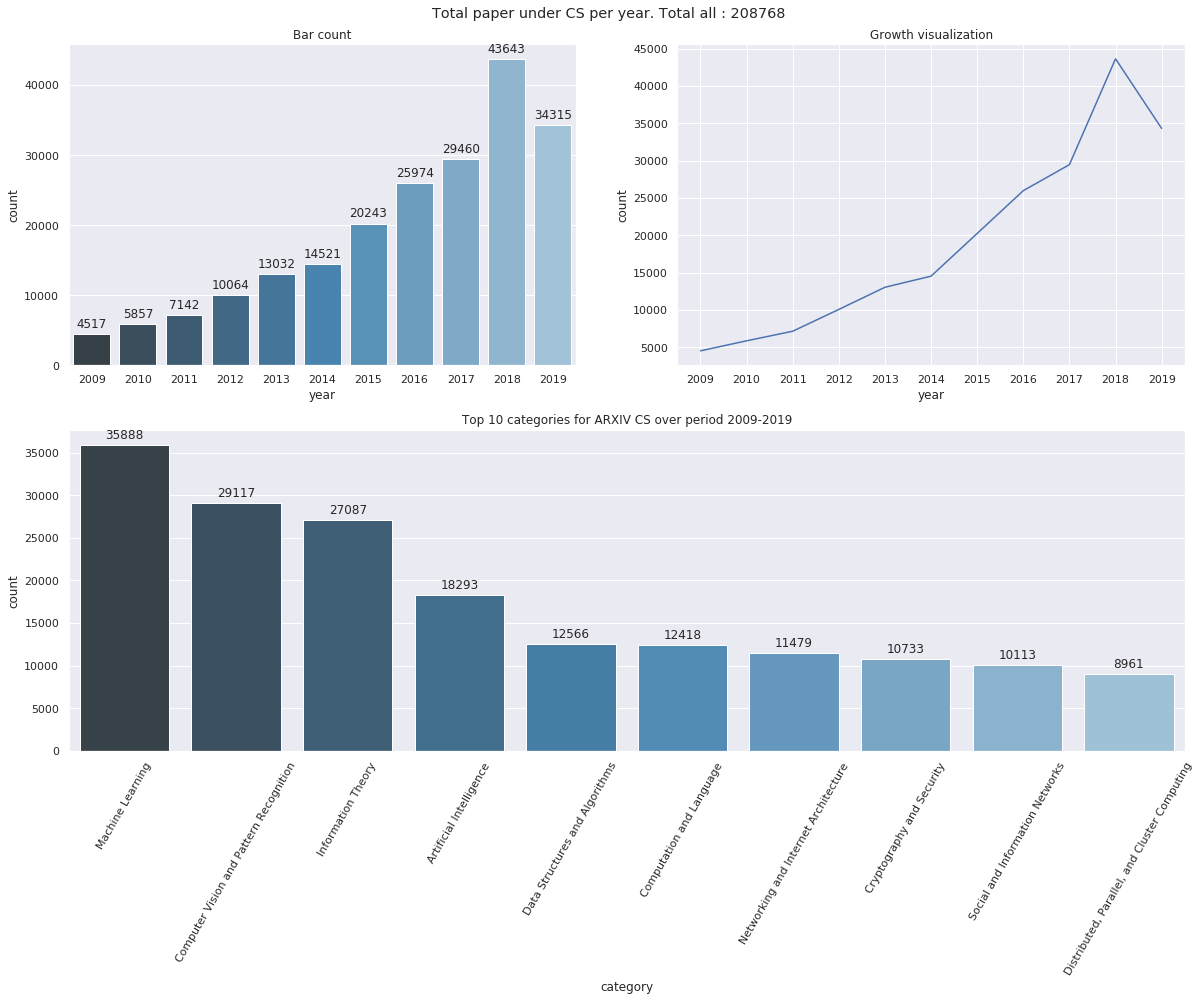

In [281]:
year_paper_count = dict()
categories_count = defaultdict(int)

for y in year:
    year_paper_count[y] = 0
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data_obj = pd.read_csv(os.path.join(ABS_PATH, d))
        # Count per year
        year_paper_count[y] += len(data_obj) 
        
        # categories
        data_obj = data_obj['categories']
        for d in data_obj:
            for w in d.split(' '):
                if 'physics' not in w:
                    if 'cs.' in w:
                        categories_count[w] += 1

categories = sorted(categories_count.items(), key=lambda x:x[1], reverse=True)
categories = [(cs_arxiv_cat[x[0].lower()], x[1]) for x in categories]

df_year = pd.DataFrame({'year': year, 'count':[year_paper_count[y] for y in year]})
df_categories = pd.DataFrame({'category':[c[0] for c in categories[:10]],
                             'count':[c[1] for c in categories[:10]]})

plt.figure(figsize=(20,13))
plt.suptitle('Total paper under CS per year. Total all : {}'.format(len(data)), y=.92)

sub = plt.subplot(2, 2, 1)
sub.set_title('Bar count')
ax = sns.barplot(x="year", y="count", data=df_year, palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sub = plt.subplot(2, 2, 2)  
sub.set_title('Growth visualization')
ax = sns.lineplot(x="year", y="count", data=df_year)

sub = plt.subplot(2,1,2)
sub.set_title('Top 10 categories for ARXIV CS over period 2009-2019')
ax = sns.barplot(x="category", y="count", data=df_categories, palette="Blues_d")
ax.set_xticklabels(rotation=60, labels=df_categories['category'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

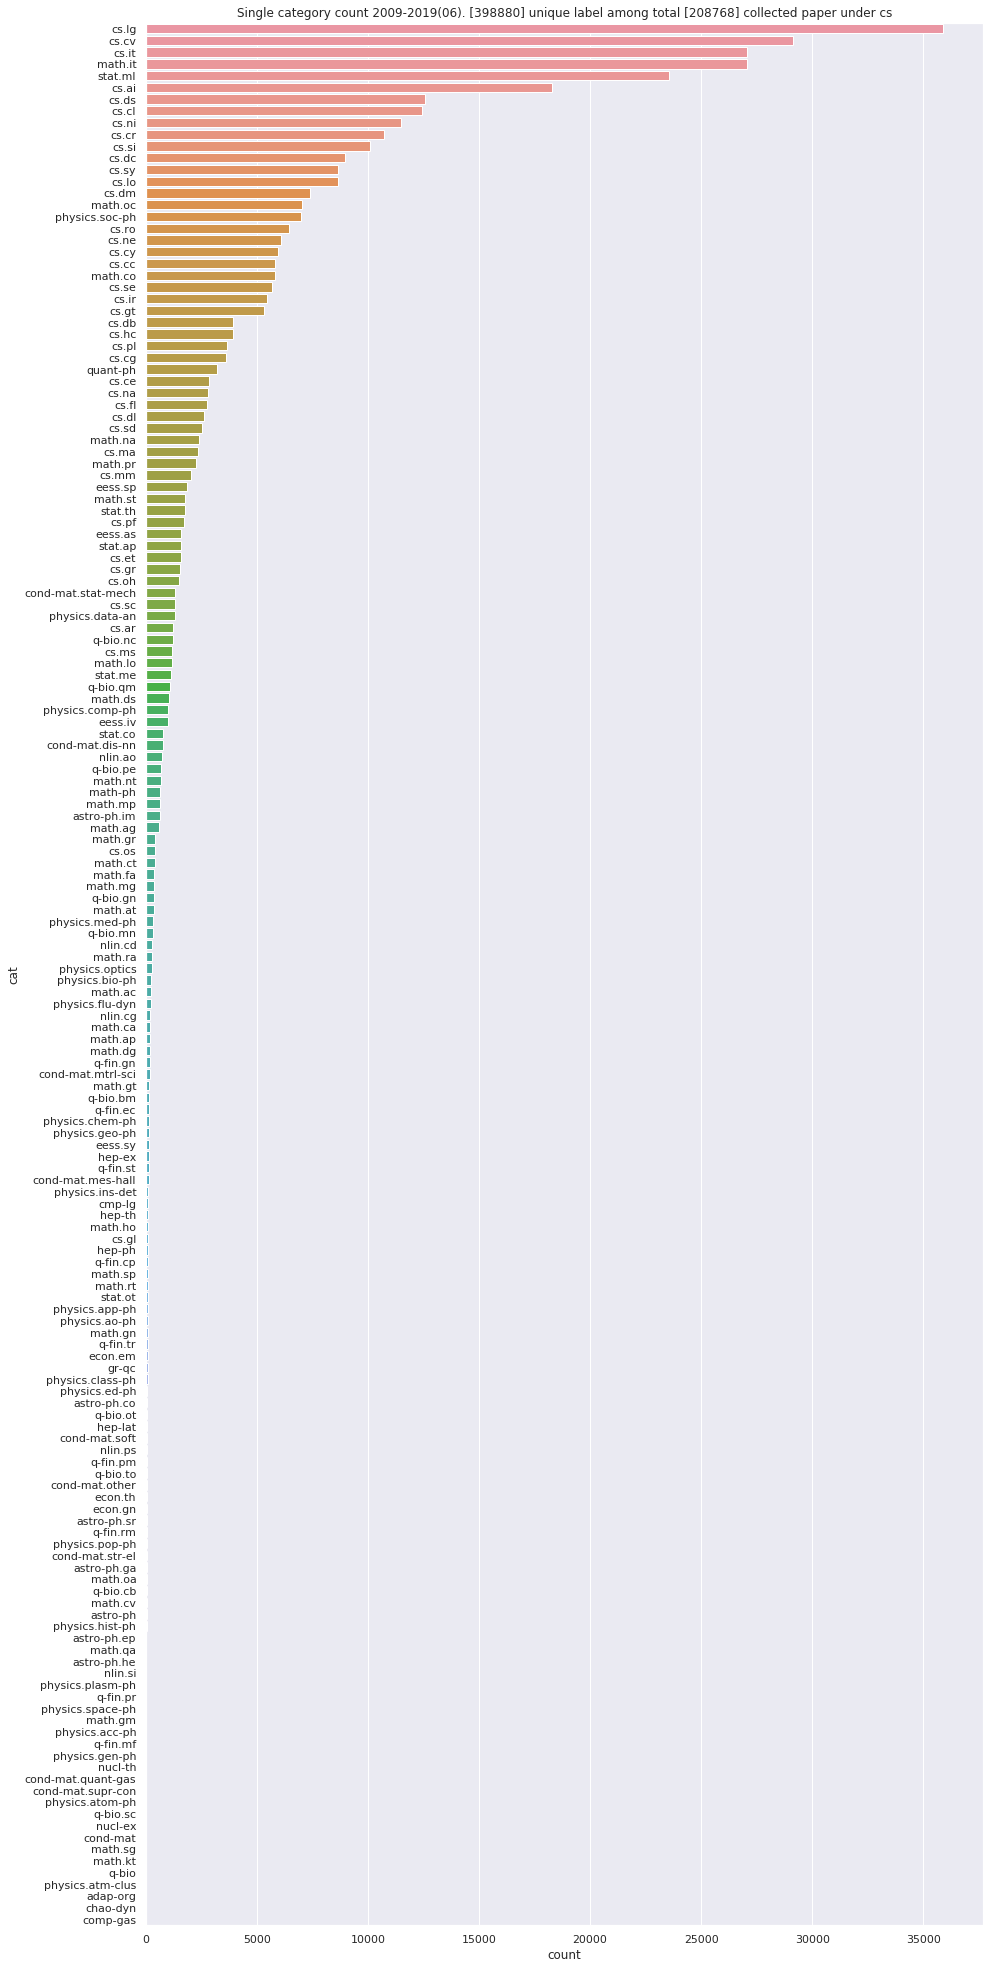

In [286]:
def label_mapping(label):
    return sorted(label.split(' '))

data['categories'] = data['categories'].apply(label_mapping)

single_category = []

for d in data['categories']:
    for i in d:
        single_category.append(i)

c = Counter(single_category)


single_category_df = pd.DataFrame({'cat':[x[0] for x in c.most_common()],
                                  'count':[x[1] for x in c.most_common()]})

plt.figure(figsize=(15, 35))
plt.title('Single category count 2009-2019(06). [{}] unique label among total [{}] collected paper under cs'.format(len(single_category), len(data)))
ax = sns.barplot(x="count", y="cat", data=single_category_df)
# ax.set_yticklabels(rotation=90, labels=single_category_df['cat'])

In [7]:
def label_mapping(label):
    return sorted(label.split(' '))

# data['categories'] = data['categories'].apply(label_mapping)

single_category = []

for d in data['categories']:
    ai_crypto = []
    
    if 'cs.ai' in d:
        ai_crypto.append('cs.ai')
    if 'cs.cr' in d:
        ai_crypto.append('cs.cr')
    single_category.append((len(ai_crypto), ' '.join(ai_crypto)))




# single_category_df = pd.DataFrame({'cat':[x[0] for x in c.most_common()],
#                                   'count':[x[1] for x in c.most_common()]})

# plt.figure(figsize=(15, 35))
# plt.title('Single category count 2009-2019(06). [{}] unique label among total [{}] collected paper under cs'.format(len(single_category), len(data)))
# ax = sns.barplot(x="count", y="cat", data=single_category_df)
# # ax.set_yticklabels(rotation=90, labels=single_category_df['cat'])

In [8]:
np.sum([s[0] for s in single_category])

29026

In [9]:
each_cat = np.array([s[0] for s in single_category])

In [10]:
np.sum(each_cat == 1), np.sum(each_cat == 2)

(28396, 315)

In [12]:
# need to plot between ai and crypto and both 
from collections import Counter

co = Counter(single_category)

In [24]:
group = co.most_common()
group

[((0, ''), 180057),
 ((1, 'cs.ai'), 17978),
 ((1, 'cs.cr'), 10418),
 ((2, 'cs.ai cs.cr'), 315)]

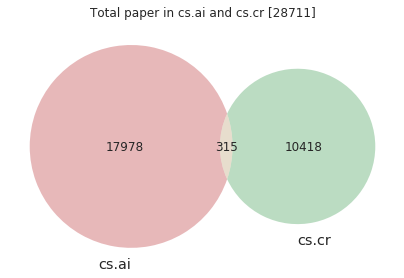

In [42]:
from matplotlib_venn import venn2

plt.figure(figsize=(7,7))
venn2(subsets = (group[1][1], group[2][1], group[3][1]), set_labels = ('cs.ai', 'cs.cr'))
plt.title('Total paper in cs.ai and cs.cr [{}]'.format(np.sum([i[1] for i in group[1:]])))
plt.show()


In [33]:
indices = np.where(np.array([s[0] for s in single_category]) == 1)[0]

In [34]:
indices.shape

(28396,)

In [39]:
# we got indices. 
# Now let's see what kind of words do they have.

X_ = data.iloc[indices]

In [40]:
# Let's put on parquet file for ease access

X_.head()

,id,title,categories,abstract,doi,created,updated,authors
23,1012.0065,counting in graph covers: a combinatorial char...,cs.it cond-mat.stat-mech cs.ai math.co math.it,we present a combinatorial characterization of...,10.1109/tit.2013.2264715,2010-11-30,2012-10-09,['vontobel']
34,1108.2283,a survey on independence-based markov networks...,cs.ai cs.lg,this work reports the most relevant technical ...,10.1007/s10462-012-9346-y,2011-08-10,2013-11-20,['schlüter']
36,1108.5935,the rabin cryptosystem revisited,math.nt cs.cr cs.it math.it,the rabin public-key cryptosystem is revisited...,NaN,2011-08-30,2013-11-03,"['elia', 'piva', 'schipani']"
69,1205.4778,backscatter from the data plane --- threats to...,cs.ni cs.cr,information-centric networking proposals attra...,10.1016/j.comnet.2013.07.009,2012-05-21,2012-09-02,"['wählisch', 'schmidt', 'vahlenkamp']"
86,1208.2076,upper bounds on the number of codewords of som...,cs.it cs.cr math.it,separating codes have their applications in co...,NaN,2012-08-09,2013-11-21,"['kim', 'sin', 'song']"


In [45]:
# Need to change column id to byte
X_['id'] = X_['id'].astype(str)
X_.to_parquet('./dataset/arxiv_ai_crypto_data.parquet')

/home/anneke/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
data['id'] = data['id'].astype(str)

In [57]:
data.to_parquet('./dataset/arxiv_cs_09_19_data.parquet')

In [4]:
X_ = pd.read_parquet('./dataset/arxiv_ai_crypto_data.parquet')

# Test AI VS Crypto

## Let's exclude papers with both.

### Data split on (1./3) 

In [52]:
X_

,id,title,categories,abstract,doi,created,updated,authors
23,1012.0065,counting in graph covers: a combinatorial char...,cs.it cond-mat.stat-mech cs.ai math.co math.it,we present a combinatorial characterization of...,10.1109/tit.2013.2264715,2010-11-30,2012-10-09,['vontobel']
34,1108.2283,a survey on independence-based markov networks...,cs.ai cs.lg,this work reports the most relevant technical ...,10.1007/s10462-012-9346-y,2011-08-10,2013-11-20,['schlüter']
36,1108.5935,the rabin cryptosystem revisited,math.nt cs.cr cs.it math.it,the rabin public-key cryptosystem is revisited...,None,2011-08-30,2013-11-03,"['elia', 'piva', 'schipani']"
69,1205.4778,backscatter from the data plane --- threats to...,cs.ni cs.cr,information-centric networking proposals attra...,10.1016/j.comnet.2013.07.009,2012-05-21,2012-09-02,"['wählisch', 'schmidt', 'vahlenkamp']"
86,1208.2076,upper bounds on the number of codewords of som...,cs.it cs.cr math.it,separating codes have their applications in co...,None,2012-08-09,2013-11-21,"['kim', 'sin', 'song']"
94,1210.1790,everlasting secrecy by exploiting non-idealiti...,cs.cr cs.it math.it,secure communication over a memoryless wiretap...,None,2012-10-05,2013-11-15,"['sheikholeslami', 'goeckel', 'pishro-nik']"
96,1210.8260,mean field theory of dynamical systems driven ...,nlin.cd cond-mat.dis-nn cs.ai,dynamical systems driven by strong external si...,10.1103/physreve.87.042809,2012-10-31,2013-03-13,"['massar', 'massar']"
104,1212.0873,parallel coordinate descent methods for big da...,math.oc cs.ai stat.ml,in this work we show that randomized (block) c...,None,2012-12-04,2013-11-25,"['richtárik', 'takáč']"
129,1302.1192,homomorphic encryption with access policies: c...,cs.cr,a characterization of predicate encryption (pe...,10.1007/978-3-642-38553-7_4,2013-02-05,2013-11-05,"['clear', 'hughes', 'tewari']"
130,1302.2128,modulus computational entropy,cs.it cs.cr math.it,the so-called {\em leakage-chain rule} is a ve...,None,2013-02-08,2013-11-25,['skorski']


In [5]:
def apply_categories(data, labels=['cs.ai', 'cs.cr']):
    '''
        Need to make sure that there is no overlap between these categories first!
    '''
    
    for l in labels:
        if l in data.split(' '):
            return l

X_['categories'] = X_['categories'].apply(apply_categories)

In [30]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_['abstract'], X_['categories'], test_size=(1./3), random_state=42)

In [31]:
X_train = list(X_train)
X_test = list(X_test)

In [32]:
from nltk.tokenize import word_tokenize

X_train = [word_tokenize(text) for text in X_train]
X_test = [word_tokenize(text) for text in X_test]

In [25]:
X_train.shape, X_test.shape

((18930,), (9466,))

In [27]:
type(X_train)

pandas.core.series.Series

In [29]:
X_train

['secret sharing in user hierarchy represents a challenging area for research. although a lot of work has already been done in this direc- tion, this paper presents a novel approach to share a secret among a hierarchy of users while overcoming the limitations of the already exist- ing mechanisms. our work is based on traditional (k +1; n)-threshold secret sharing, which is secure as long as an adversary can compromise not more than k secret shares. but in real life it is often feasible for an adversary to obtain more than k shares over a long period of time. so, in our work we also present a way to overcome this vulnerability, while implementing our hierarchical secret sharing scheme. the use of elliptic curve cryptography makes the computations easier and faster in our work.',
 'we develop a novel bi-directional attention model for dependency parsing, which learns to agree on headword predictions from the forward and backward parsing directions. the parsing procedure for each directio

In [33]:
to_binary = {'cs.ai':1, 'cs.cr':0}
y_train = y_train.apply(lambda x: to_binary[x])

In [34]:
y_test = y_test.apply(lambda x: to_binary[x])

## Test logistic regression

In [35]:
from utils import utils

X_train, X_test, cv = utils.vectorize_keywords_docs(X_train, X_test, return_cv=True)

In [36]:
len(cv.vocabulary_)

2565

In [37]:
cv.vocabulary_

{'secret': 2075,
 'sharing': 2127,
 'in': 1185,
 'user': 2455,
 'hierarchy': 1118,
 'represents': 1979,
 'a': 28,
 'challenging': 354,
 'area': 178,
 'for': 991,
 'research': 1987,
 'although': 127,
 'lot': 1398,
 'of': 1600,
 'work': 2551,
 'has': 1098,
 'already': 123,
 'been': 261,
 'done': 740,
 'this': 2347,
 'paper': 1665,
 'presents': 1779,
 'novel': 1575,
 'approach': 165,
 'to': 2363,
 'share': 2125,
 'among': 129,
 'users': 2456,
 'while': 2534,
 'the': 2329,
 'limitations': 1370,
 'exist': 874,
 'mechanisms': 1459,
 'our': 1643,
 'is': 1292,
 'based': 247,
 'on': 1606,
 'traditional': 2383,
 'k': 1307,
 '1': 2,
 'n': 1528,
 'threshold': 2355,
 'which': 2533,
 'secure': 2076,
 'as': 190,
 'long': 1393,
 'an': 132,
 'adversary': 90,
 'can': 322,
 'compromise': 456,
 'not': 1570,
 'more': 1512,
 'than': 2327,
 'but': 313,
 'real': 1904,
 'life': 1362,
 'it': 1295,
 'often': 1605,
 'feasible': 953,
 'obtain': 1595,
 'over': 1653,
 'period': 1704,
 'time': 2361,
 'so': 2172,
 'we

In [39]:
import sklearn

clf = sklearn.linear_model.LogisticRegression()
clf.fit(X_train['docs'], y_train)

weight = clf.coef_[0]
words = cv.get_feature_names()

crypto_indices = np.argsort(weight)
ai_indices = crypto_indices[::-1]

In [42]:
threshold = 100
k_ai = []
k_crypto = []
w_ai = []
w_crypto = []

print('-'*10,'{} KEYWORD ASSOCIATED WITH [cs.ai and cs.cr] CATEGORY'.format(threshold))
print('\t{:<20}\t\t{:<20}'.format('Sci/tech', 'Sports'))
for i, (ai, crypto) in enumerate(zip(ai_indices[:threshold], crypto_indices[:threshold])):
    print('{:03d}\t{:<20}\t{:.3f}\t{:<20}\t{:.3f}'.format(i+1, 
                                                          words[ai], 
                                                          weight[ai], 
                                                          words[crypto], 
                                                          weight[crypto]))
    k_ai.append(words[ai])
    k_crypto.append(words[crypto])
    w_ai.append(weight[ai])
    w_crypto.append(weight[crypto])

scisport_df = pd.DataFrame({'sci/tech_k':k_ai, 
                            'sci/tech_w':w_ai,
                            'sports_k':k_crypto, 
                            'sports_w':w_crypto})

---------- 100 KEYWORD ASSOCIATED WITH [cs.ai and cs.cr] CATEGORY
	Sci/tech            		Sports              
001	ai                  	1.939	security            	-4.004
002	belief              	1.790	privacy             	-3.956
003	ontology            	1.749	malware             	-3.337
004	reinforcement       	1.714	blockchain          	-3.172
005	diagnosis           	1.689	attacks             	-3.016
006	planning            	1.683	attack              	-2.790
007	fuzzy               	1.611	secret              	-2.758
008	uncertainty         	1.587	cryptography        	-2.751
009	constraint          	1.525	encryption          	-2.649
010	argumentation       	1.516	intrusion           	-2.592
011	preferences         	1.493	malicious           	-2.583
012	causal              	1.441	cryptographic       	-2.475
013	agent               	1.434	secure              	-2.393
014	style               	1.427	vulnerabilities     	-2.346
015	intelligence        	1.409	authentication      	-2.234
016	r